In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [264]:
import matplotlib.pyplot as plt

# Task1

## Ex. 1. Use the head and describe function to examine the data and display few columns.

In [265]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [266]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Ex. 2. Plot and analyze the data, where: x - population, y - profit.

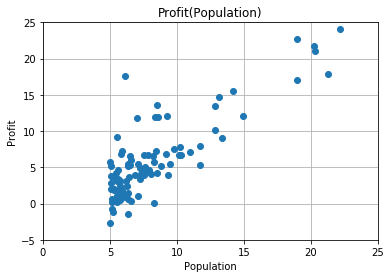

In [267]:
figure1 = plt.Figure()
plt.plot(data['Population'],data['Profit'],'o')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit(Population)')
plt.xlim(0,25)
plt.ylim(-5,25)
plt.grid()

### The comment to the figure above

## Ex. 3 In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [268]:
data.insert(0, "1s", 1) #To insert a column (where to insert, name, values)
#del data["1s"]          #To delete the column(name)

In [269]:
data.head(10)

,1s,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


## Ex. 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2). Check with the head function if your implementation is correct:

In [270]:
X_1 = pd.DataFrame(data = np.c_[data["1s"], data["Population"]], columns = ["1s","Population"])

In [271]:
X_1.head(5)

,1s,Population
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [272]:
Y_1 = pd.DataFrame(data = data["Profit"])
Y_1.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### Finally, we’re going to convert our data frames to numpy matrices and instantiate a parameter matirx. We also need to initialise parameter θ.

In [273]:
x = np.matrix(X_1.values)
y = np.matrix(Y_1.values)
theta = np.matrix(np.array([0,0]))

## Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X, y and parameter θ.

In [274]:
mult = np.multiply #aliasing
power = np.power   #aliasing
summarize = np.sum #aliasing

def computeCost(X, y, theta):
    
    m = len(X)
    h = mult(theta,X)
    f = h.sum(axis = 1)
    J = (1/(2*m))*summarize(power((f - y),2))

    return J
        
    

## Ex. 7 Test the cost function with (θ=0).Output: 32.07 (may differ…)

In [275]:
print(computeCost(x,y,theta))

32.072733877455676


## Ex. 8. Please implement the gradient descent algorithm:
### -the function returns optimized values θ and a vector of the cost function value for each iteration

In [277]:
mult = np.multiply #aliasing
power = np.power   #aliasing
summarize = np.sum #aliasing

def gradient_prosty(X, y, theta, alpha, it):
    # it - iteration nb.
    m = len(X)
    
    cost = np.zeros(it)
    
    for i in range(it):
        h = mult(theta,X)
        f = h.sum(axis = 1)
        cost[i] = computeCost(X, y, theta)
        theta0 = theta[0,0] - (alpha/m)*summarize(f - y)
        X2T = np.reshape(X[:,1], newshape = (len(X[:,1]),1)) # second column of X
        theta1 = theta[0,1] - (alpha/m)*summarize(mult((f - y),X2T) )
        theta = np.matrix(np.array([theta0, theta1]))
        
        
    #return theta, cost
    return theta, cost

## Ex. 9 Please calculate the optimal parameters for the dataset.

In [278]:
alpha = 0.01
it = 1000
theta_res, cost = gradient_prosty(x, y, theta, alpha, it)
print(theta_res)

[[-3.24140214  1.1272942 ]]


In [279]:
arg = np.linspace(0, 25, 2)
linReg1 = theta_res[0,1] * arg + theta_res[0,0]

## Ex. 10 Please calculate the cost function for the given (zad.8) θ.

In [280]:
print(computeCost(x, y, theta_res))

4.515955503078912


## Ex. 11 Plot the regression function and our dataset.

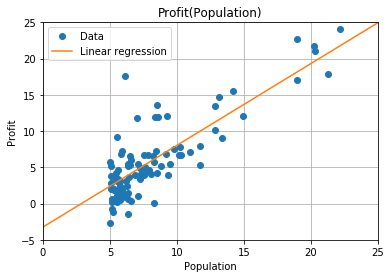

In [281]:
figure1 = plt.Figure()
plt.plot(data['Population'],data['Profit'],'o')
plt.plot(arg,linReg1)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit(Population)')
plt.xlim(0,25)
plt.ylim(-5,25)
plt.legend(['Data','Linear regression'])
plt.grid()

## Ex. 12 Plot the relationship between the cost function and number of iterations.

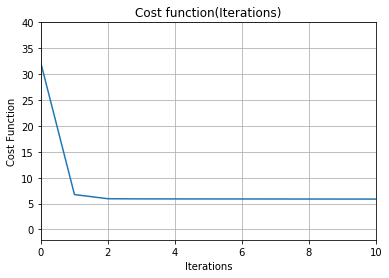

In [282]:
arg2 = np.linspace(0, 1000,1000)
figure1 = plt.Figure()
plt.plot(arg2,cost)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost function(Iterations)')
plt.xlim(0,10)
plt.ylim(-2,40)
plt.grid()


# Task2

In [283]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [284]:
size_m = data2['Size'].mean()
bedrooms_m = data2['Bedrooms'].mean()
price_m = data2['Price'].mean()

size_std = data2['Size'].std()
bedrooms_std = data2['Bedrooms'].std()
price_std = data2['Price'].std()

In [285]:
print('size_m: ', size_m,'\nbedrooms_m: ', bedrooms_m,'\nprice_m: ',price_m)

size_m:  2000.6808510638298 
bedrooms_m:  3.1702127659574466 
price_m:  340412.6595744681


In [286]:
print('size_std: ', size_std,'\nbedrooms_std: ', bedrooms_std,'\nprice_std: ',price_std)

size_std:  794.7023535338897 
bedrooms_std:  0.7609818867800999 
price_std:  125039.89958640098


In [287]:
data2['Size'] = (data2['Size'] - data2['Size'].mean())/data2['Size'].std()
data2['Bedrooms'] = (data2['Bedrooms'] - data2['Bedrooms'].mean())/data2['Bedrooms'].std()
data2['Price'] = (data2['Price'] - data2['Price'].mean())/data2['Price'].std()

In [288]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [289]:
data2 = (data2 - data2.mean())/data2.std()

### step3

In [290]:
data2.insert(0, "1s", 1)
data2.head(3)

,1s,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626


### step4

In [291]:
X_2 = pd.DataFrame(data = np.c_[data2["1s"], data2["Size"], data2["Bedrooms"]], columns = ["1s","Size","Bedrooms"])
X_2.head(2)

,1s,Size,Bedrooms
0,1.0,0.13001,-0.223675
1,1.0,-0.50419,-0.223675


In [292]:
Y_2 = pd.DataFrame(data = data2["Price"])
Y_2.head(3)

,Price
0,0.475747
1,-0.084074
2,0.228626


### step5

In [293]:
x2 = np.matrix(X_2.values)
y2 = np.matrix(Y_2.values)
theta2 = np.matrix(np.array([0,0,0]))

### step7

In [294]:
print(computeCost(x2, y2, theta2))

0.4893617021276598


### step8

In [297]:
mult = np.multiply #aliasing
power = np.power   #aliasing
summarize = np.sum #aliasing

def gradient_prosty(X, y, theta, alpha, it):
    # it - iteration nb.
    m = len(X)
    
    cost = np.zeros(it)
    
    for i in range(it):
        h = mult(theta,X)
        f = h.sum(axis = 1)
        cost[i] = computeCost(X, y, theta)
        theta0 = theta[0,0] - (alpha/m)*summarize(f - y)
        X2T = np.reshape(X[:,1], newshape = (len(X[:,1]),1)) # second column of X
        theta1 = theta[0,1] - (alpha/m)*summarize(mult((f - y),X2T) )
        theta = np.matrix(np.array([theta0, theta1]))
        
        
    #return theta, cost
    return theta, cost

In [296]:
alpha2 = 0.01
it2 = 1000
theta_res2, cost2 = gradient_prosty(x2, y2, theta2, alpha2, it2)
print(theta_res)

ValueError: operands could not be broadcast together with shapes (1,2) (47,3) 